In [9]:
# HYPER PARAMETERS

PAST_DATA_START = "1978"
PAST_DATA_END = "1983"

CURRENT_DATA_START = "2016"
CURRENT_DATA_END = "2021"

In [13]:
import arch
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from arch.unitroot import PhillipsPerron
import pandas as pd
import numpy as np
import statsmodels.api as sm


data = pd.read_csv("dataset.csv", index_col = 0, parse_dates = True)

past_data = data[PAST_DATA_START: PAST_DATA_END]
current_data = data[CURRENT_DATA_START: CURRENT_DATA_END]


In [14]:
def pp_test(series: pd.Series) -> None:

    pp = PhillipsPerron(series)
    print(f" \n {series.name}")
    print(pp.summary().as_text())

<AxesSubplot:xlabel='DATE'>

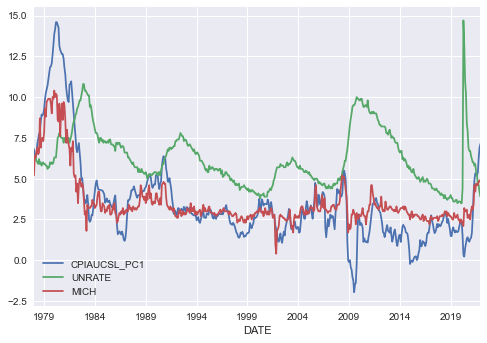

In [21]:
data.plot()

In [26]:
data.apply(pp_test)

 
 CPIAUCSL_PC1
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.308
P-value                         0.169
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 UNRATE
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.266
P-value                         0.016
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 MICH
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.697
P-value                         0.075
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.4

CPIAUCSL_PC1    None
UNRATE          None
MICH            None
dtype: object

In [22]:
past_data.apply(pp_test)

 
 CPIAUCSL_PC1
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.776
P-value                         0.826
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 UNRATE
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.127
P-value                         0.704
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 MICH
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.153
P-value                         0.693
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.5

CPIAUCSL_PC1    None
UNRATE          None
MICH            None
dtype: object

In [23]:
current_data.apply(pp_test)

 
 CPIAUCSL_PC1
     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.440
P-value                         0.983
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 UNRATE
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.653
P-value                         0.083
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.53 (1%), -2.90 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 MICH
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.369
P-value                         0.915
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.5

CPIAUCSL_PC1    None
UNRATE          None
MICH            None
dtype: object

<AxesSubplot:xlabel='DATE'>

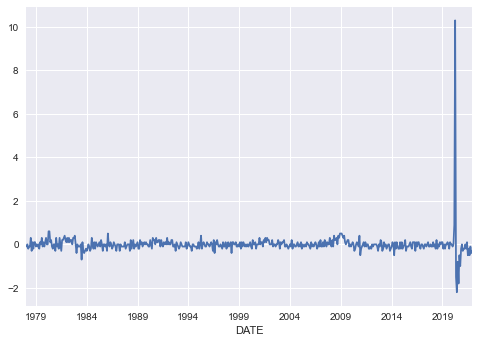

In [33]:
data['UNRATE'].diff().plot()

In [38]:
data.diff().dropna().apply(pp_test)

 
 CPIAUCSL_PC1
     Phillips-Perron Test (Z-tau)    
Test Statistic                -13.505
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 UNRATE
     Phillips-Perron Test (Z-tau)    
Test Statistic                -22.543
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
 
 MICH
     Phillips-Perron Test (Z-tau)    
Test Statistic                -30.414
P-value                         0.000
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.4

CPIAUCSL_PC1    None
UNRATE          None
MICH            None
dtype: object

In [39]:
def plot_philips(data):

  dates = [x.timestamp() for x in data.index]
  plt.figure(figsize=(10, 8))
  plt.grid(True)
  plt.scatter(data['UNRATE'].values, data['CPIAUCSL_PC1'].values,
              c=dates, cmap='coolwarm', s=60, alpha=0.5)
  _ = plt.ylabel('Inflation Rate')
  _ = plt.xlabel('Unemployment Rate')
  plt.title('Scatterplot of Inflation against Unemployment')
  cbar = plt.colorbar()
  cbar.set_label('Date')
  plt.show()


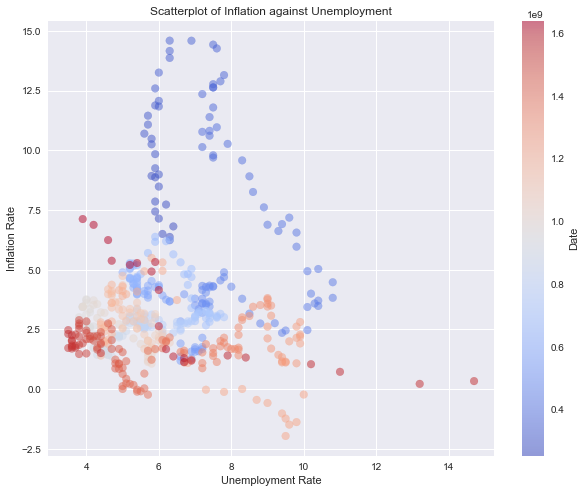

In [40]:
plot_philips(data)

In [ ]:
plot(past)